# Larmor Radiation

This interactive simulation illustrates how, in the non-relativistic regime,
accelerating a charged particle at a characteristic frequency $\nu$ launches
oscillations in the electric field that propagate outward as an electromagnetic
wave.

The power radiated by an accelerated charge (integrating over all angles) follows the **Larmor formula**:
\begin{equation}
P = \frac{2}{3}\frac{e^2 a^2}{c^3},
\end{equation}
where $e$ is the charge of the particle, $a$ is the magnitude of the acceleration, and $c$ is the speed of light.

However, as the simulation shows, more power is radiated in directions perpendicular to the axis of acceleration.
This effect can be understood as the projection of the acceleration perpendicular to the field line connecting the charge to the observer. The **Poynting Flux** for any chosen direction is given by:
\begin{equation}
{\vec E\times\vec B\over4\pi}c=e^2a^2{\sin^2\theta\over4\pi r^2},
\end{equation}
where $E$ and $B$ are the electric and magnetic fields, respectively, $\theta$ is the angle of the chosen direction relative to the axis of the acceleration vector $\vec a$,
and $r$ is our distance from the radiating charge.

Because the acceleration dictates the axis along which the electric field is perturbed, Larmor radiation
is generally **polarized**, though if an ensemble of charged particles experience accelerations in different
directions, the ensemble averaged radiation may be depolarized.

## Simulation

The simulation below shows the field lines of a charged particle (in practice, usually an electron:
electrons are light and easily accelerated) that undergoes a sinusoidal force in the $\hat x$ direction.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

In [2]:
# High-level parameters
NLINES = 16    # number of radial lines coming out
SIZE = 256     # number of points in each line
RMAX = 10      # radius of simulation (i.e. length of each line)
NSTEPS = 100   # number of cycles in simulation before repeat

# Variables derived from parameters above
xs = np.linspace(0, RMAX, SIZE)
thetas = np.linspace(0, 2*np.pi, NLINES, endpoint=False)
photons = {th: (np.cos(th) * xs, np.sin(th) * xs) for th in thetas}
ones = np.ones_like(xs)
velocities = {th: (np.cos(th) * ones, np.sin(th) * ones) for th in thetas}

def propagate_field(x0, y0, vx0, vy0, dt=0.05):
    """Launch photon wavelets along each line, propagating radially outward 
    at one index per simulation cycle."""
    for th, (x,y) in photons.items():
        vx,vy = velocities[th]
        x[1:] = x[:-1] + dt*vx[:-1] # move positions according to velocity
        y[1:] = y[:-1] + dt*vy[:-1] # move positions according to velocity
        vx[1:], vy[1:] = vx[:-1], vy[:-1] # shift stored values one cell out
        # launch wave from charge with position/velocities (x0,y0), (vx0,vy0)
        x[0], y[0] = x0, y0
        vx[0] = np.cos(th) # no Doppler
        vy[0] = np.sin(th) # no Doppler
        # store updated array back in global variables
        photons[th] = (x, y)
        velocities[th] = (vx, vy)

<IPython.core.display.Javascript object>


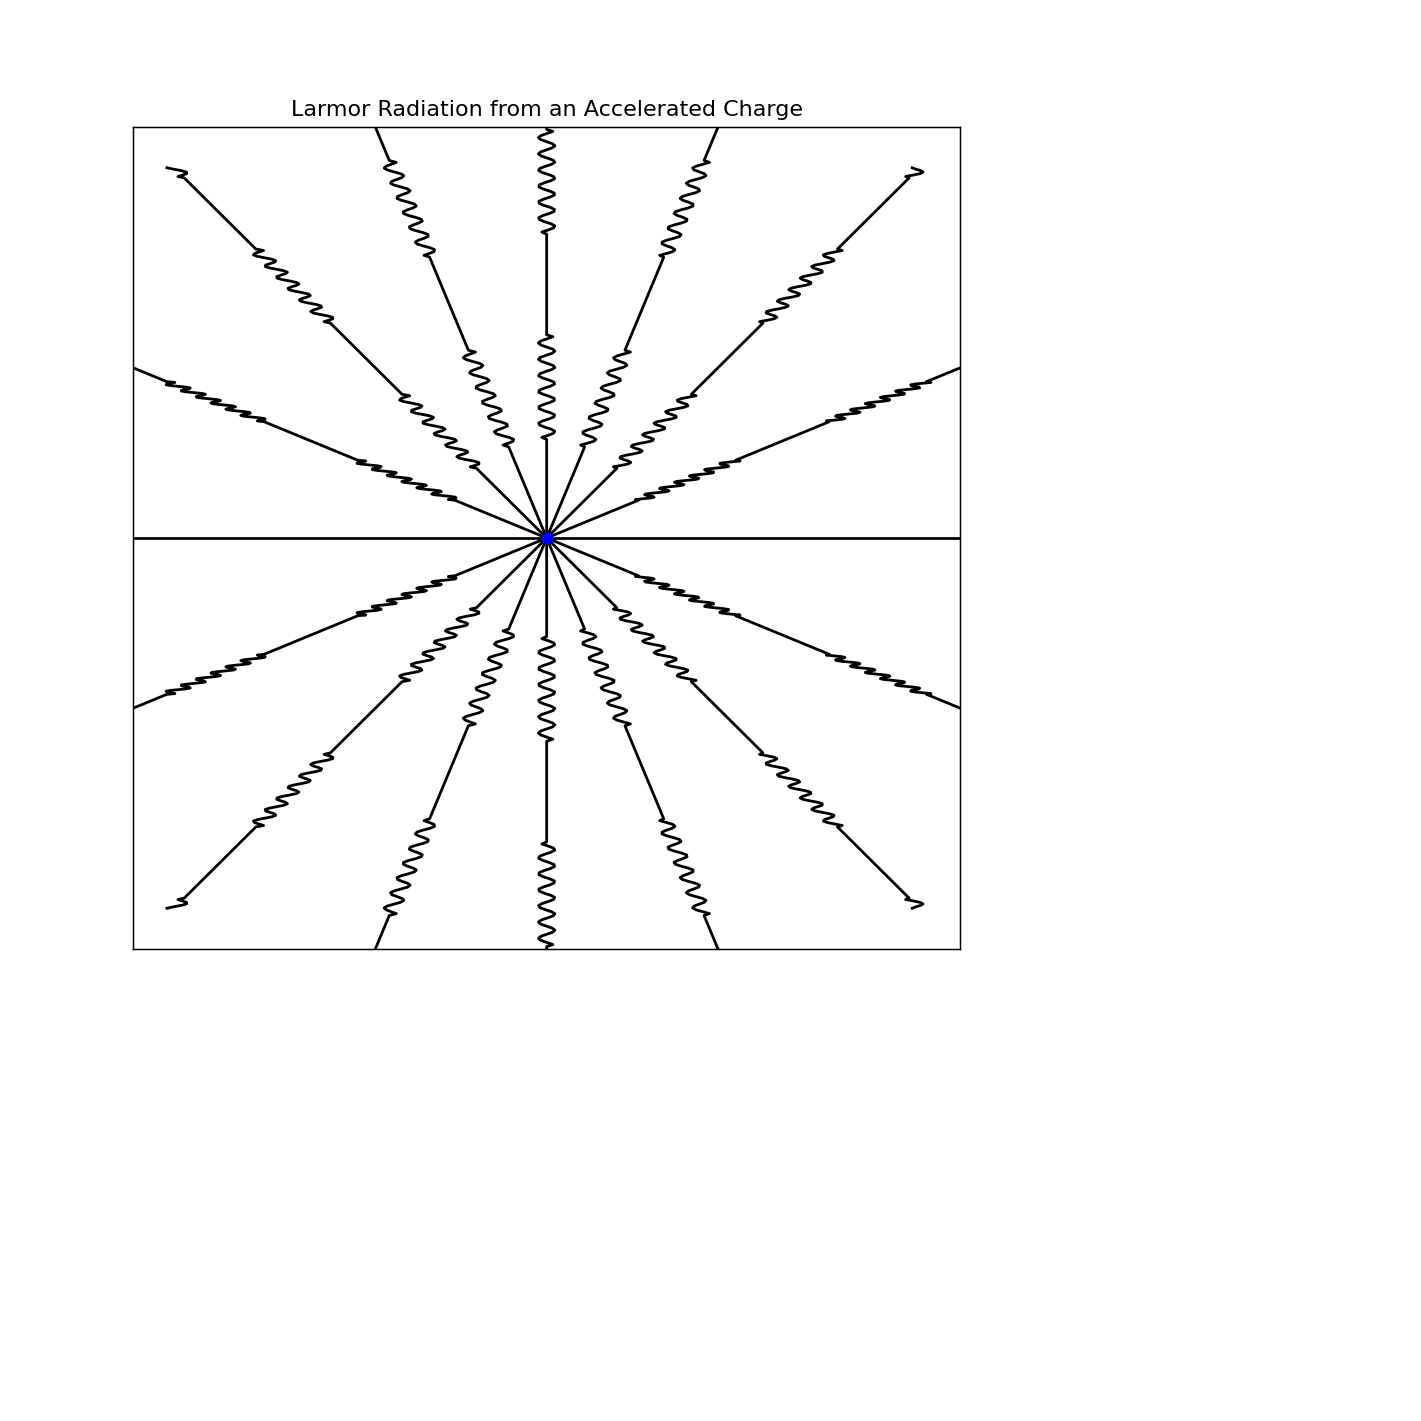

interactive(children=(FloatSlider(value=3.0, description='Acceration Frequency [Hz]', layout=Layout(grid_area=…

In [3]:
# Generate the animation figure

fig, ax = plt.subplots(1, figsize=(8,8))
lines = {} # holds handles for each radial line plot
for th in thetas:
    x, y = photons[th]
    lines[th], = ax.plot(x, y, 'k')
source, = ax.plot([0], [0], 'bh') # holds handle for plotting charge

# Slider controlling frequency of charge oscillation
freq_widget = FloatSlider(3, min=0.5, max=10, step=0.1, 
                          description='Acceration Frequency [Hz]',
                          style={'description_width':'initial'},
                          layout=Layout(width='auto', grid_area='footer'))

def animate(t):
    '''Update plots for each line according to the time step. Reads frequency
    from freq_widget. Called repeatedly by FuncAnimation.'''
    freq = freq_widget.value
    amp = 0.2
    if t < 1: # for first second, don't move
        x0, y0 = 0, 0
        vx0, vy0 = 0, 0
    else: # for second second, oscillate with frequency specified by freq_widget
        x0 = amp * np.sin(2*np.pi * freq * t)
        y0 = 0
        vx0 = amp * np.cos(2*np.pi * freq * t) # time derivative of x0
        vy0 = 0                                # time derivative of y0
    propagate_field(x0, y0, vx0, vy0)
    for th, (x,y) in photons.items():
        lines[th].set_xdata(x)
        lines[th].set_ydata(y)
    source.set_xdata([x0])
    source.set_ydata([y0])
    
def init():
    '''Set initial plot parameters. Called once by FuncAnimation at beginning.'''
    ax.set_xlim(-RMAX,RMAX)
    ax.set_ylim(-RMAX,RMAX)
    ax.set_title('Larmor Radiation from an Accelerated Charge')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
steps = np.linspace(0, 2, NSTEPS) # simulation spans 0 to 2 seconds
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)

def build_animation(freq):
    '''Function which causes FuncAnimation to redraw itself, when freq_widget changes.
    Does not actually hand off the value, but needs to accept an argument tied to
    freq_widget in order to be triggered by updating the slider.'''
    ani.new_frame_seq()

# force animation to redraw when freq_widget changes, even though
# the parameter is not actually passed through (used as global, instead)
interact(build_animation, freq=freq_widget)
plt.show()

Notice the direction-dependence of the amplitude of the outgoing wave which is characteristic of Larmor radiation.
Also notice the polarization of the outgoing electric field, which is in the direction of the acceleration
projected to be orthogonal to the axis of propagation.

Finally, play with the acceleration frequency (controlled by the slider at the bottom) to see how the
frequency of acceleration translates directly to the frequency of the emitted photon in the
non-relativistic limit for which Larmor radiation holds.